In [1]:
# Import Data

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates=['Date'])
df['Total Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


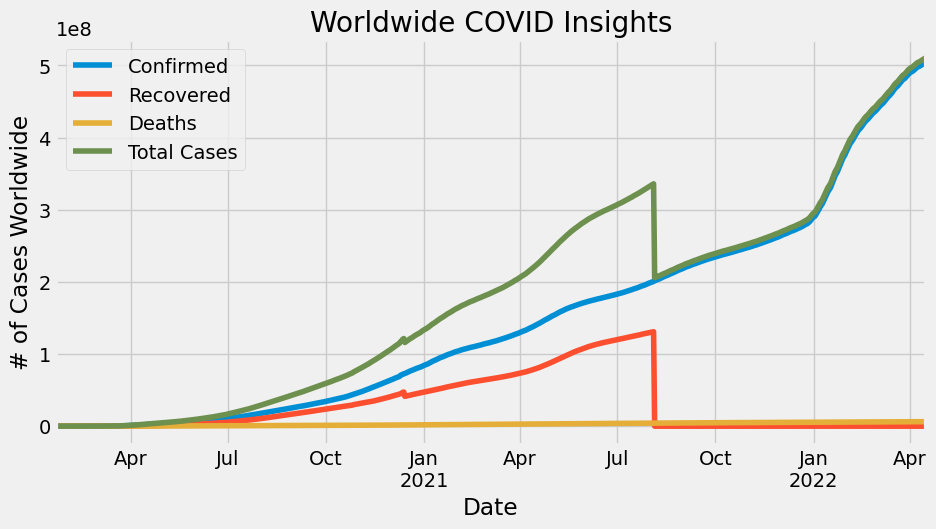

In [73]:
# Worldwide Cases

worldwide_df = df.groupby(['Date']).sum(numeric_only=True)
w = worldwide_df.plot(figsize=(12,5))
w.set_xlabel('Date')
w.set_ylabel('# of Cases Worldwide')
w.title.set_text('Worldwide COVID Insights')

plt.show()

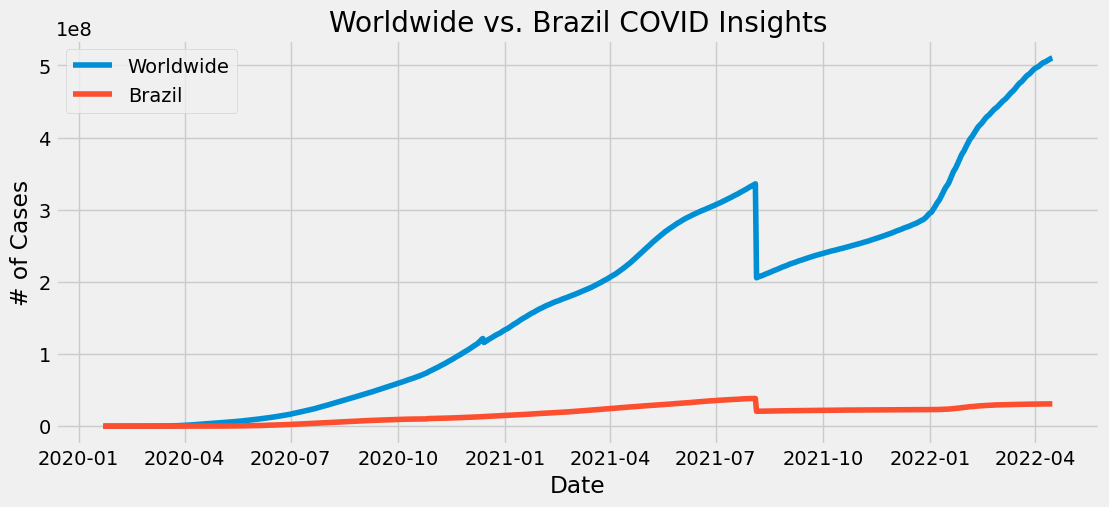

In [22]:
# Worldwide vs. Brazil

br_df = df[df['Country'] == 'Brazil'].groupby(['Date']).sum(numeric_only=True)

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label='Worldwide')
ax.plot(br_df[['Total Cases']], label='Brazil')
ax.set_xlabel('Date')
ax.set_ylabel('# of Cases')
ax.title.set_text('Worldwide vs. Brazil COVID Insights')



plt.legend(loc='upper left')
plt.show()

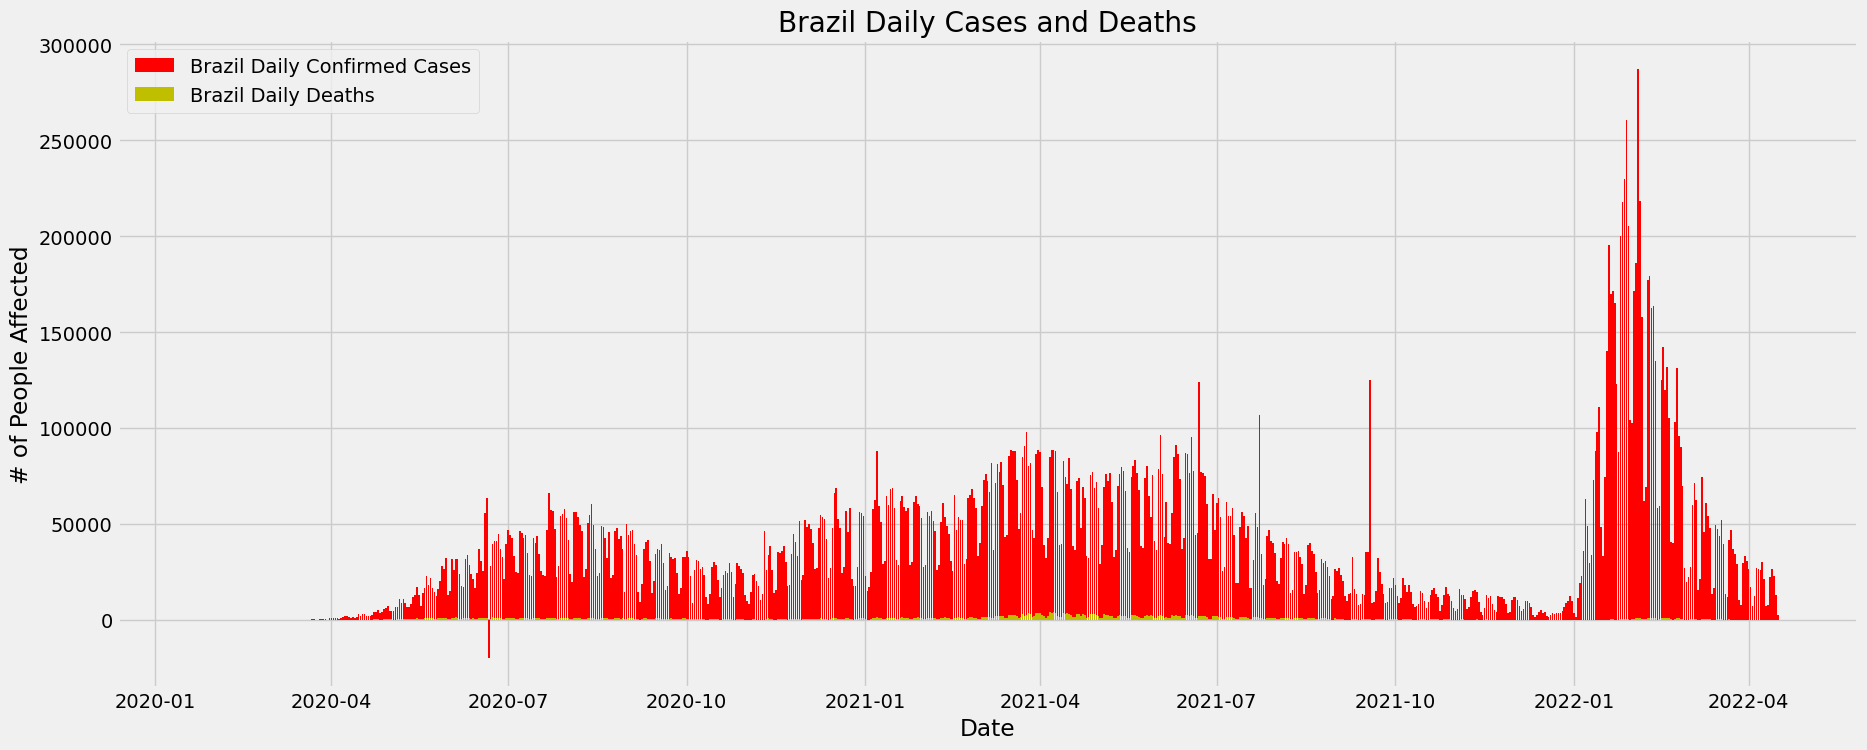

In [40]:
# Brazil Daily Cases and Deaths

br_df['Daily Confirmed'] = br_df['Confirmed'].sub(br_df['Confirmed'].shift())
br_df['Daily Deaths'] = br_df['Deaths'].sub(br_df['Deaths'].shift())


fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)

ax.bar(br_df['Date'], br_df['Daily Confirmed'], color='r', label="Brazil Daily Confirmed Cases")
ax.bar(br_df['Date'], br_df['Daily Deaths'], color='y', label="Brazil Daily Deaths")
ax.set_xlabel('Date')
ax.set_ylabel('# of People Affected')
ax.title.set_text('Brazil Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

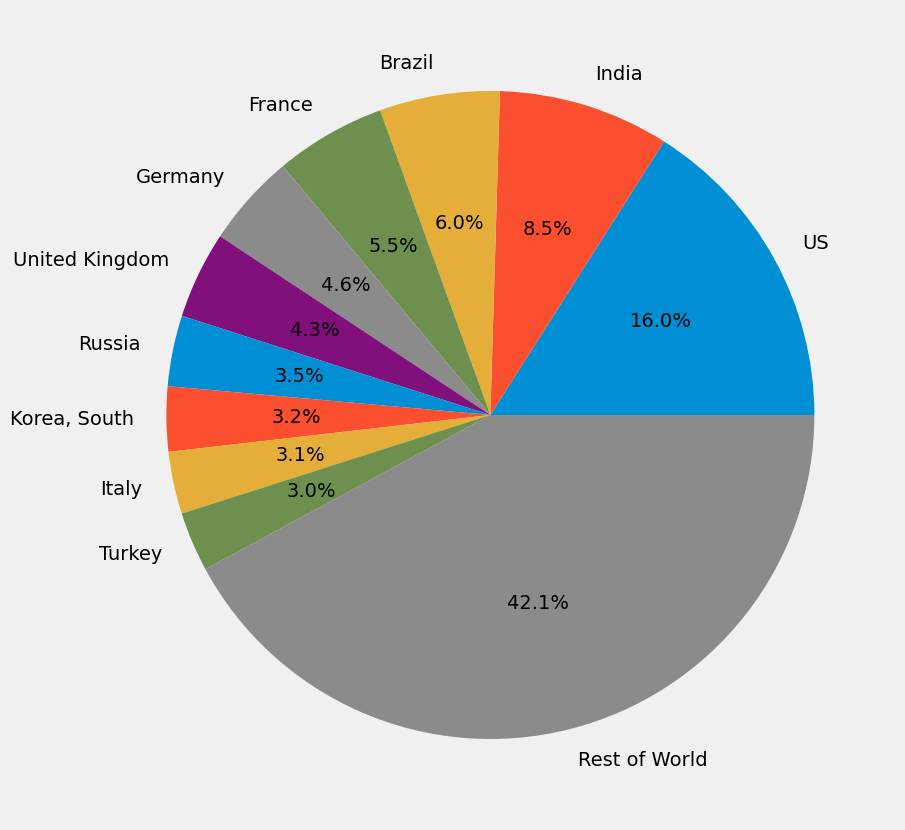

In [72]:
from datetime import date, timedelta

target_date = date(2022, 4, 16)
target_date_str = target_date.strftime('%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'])

today_df = df[df['Date'].dt.strftime('%Y-%m-%d') == target_date_str]
top_10 = today_df.sort_values(['Confirmed'], ascending=False)[:10]
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending=False)[10:].sum(numeric_only=True)
top_10.loc['rest-of-world', 'Country'] = 'Rest of World'
top_10

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels=top_10['Country'], autopct='%1.1f%%')
plt.show()